In [1]:
pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns

C:\Users\Cosmo\AppData\Local\Temp\ipykernel_17496\432526209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import japanize_matplotlib

In [6]:
df = pd.read_csv('california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [7]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [8]:
df.shape

(18572, 8)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [10]:
X = df.to_numpy()
scaler.fit(X)


StandardScaler()

In [11]:
X_scaled  = scaler.transform(X)
X_scaled


array([[ 2.95027401,  1.22609842, -0.98751408, ...,  2.745577  ,
         0.7095734 ,  0.01067288],
       [ 2.9351148 , -0.5234521 ,  0.80023789, ...,  1.76319575,
         0.90892516,  0.25820709],
       [-1.02729904,  1.31357595, -0.22735403, ...,  0.38723561,
         0.16225546,  0.6325512 ],
       ...,
       [-1.26959164, -0.87336221, -0.39847603, ..., -1.01586791,
         0.26894728,  0.344762  ],
       [-1.163095  , -0.78588468, -0.62721197, ..., -1.09521007,
         0.51108372,  0.63480794],
       [-0.83099363, -0.96083973, -0.0717104 , ..., -1.04614321,
         0.06368403,  0.19008646]])

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=4, random_state=0)


In [14]:
model.fit(X_scaled)


KMeans(n_clusters=4, random_state=0)

In [15]:
model.labels_


array([2, 2, 1, ..., 1, 1, 1])

In [16]:
df['クラスター'] = model.labels_
df.head()


,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人,クラスター
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621,2
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641,2
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410,1
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026,1
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596,1


<Axes: xlabel='クラスター', ylabel='count'>

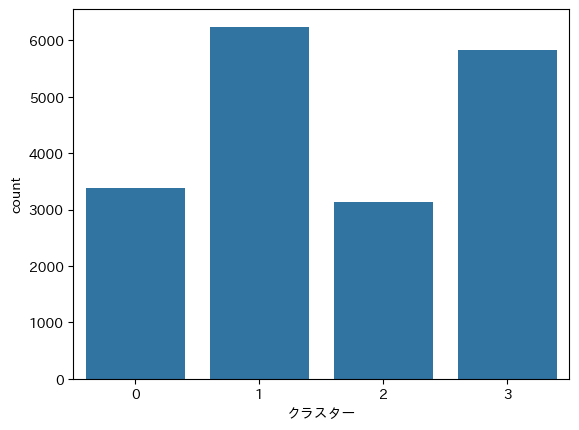

In [17]:
sns.countplot(x='クラスター', data=df)


In [18]:
df.groupby('クラスター').mean()


,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
クラスター,,,,,,,,
0,3.669358,15.493480,2509.447244,34.020246,-117.889579,1.727273,1.889554,0.401942
1,3.225646,26.458347,1247.065364,38.071834,-121.624532,1.501079,1.988813,0.411153
2,5.889375,25.794831,1238.436184,35.268504,-119.562856,3.373874,2.635198,0.463309
3,3.026291,34.846273,1232.535555,34.022209,-118.073574,1.621891,1.531342,0.346564


<Axes: xlabel='経度', ylabel='緯度'>

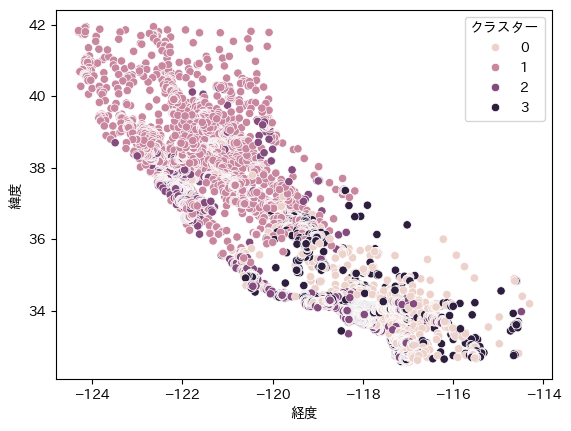

In [19]:
sns.scatterplot(x='経度', y='緯度', hue='クラスター', data=df)


<Axes: xlabel='経度', ylabel='緯度'>

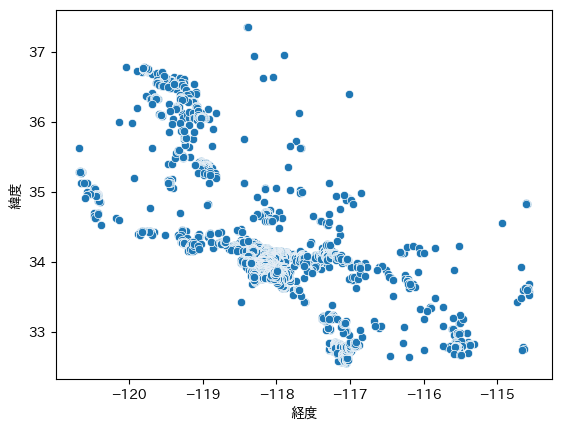

In [20]:
df_cluster3 = df.query('クラスター == 3')
sns.scatterplot(x='経度', y='緯度', data=df_cluster3)


<Axes: xlabel='地域人口', ylabel='Count'>

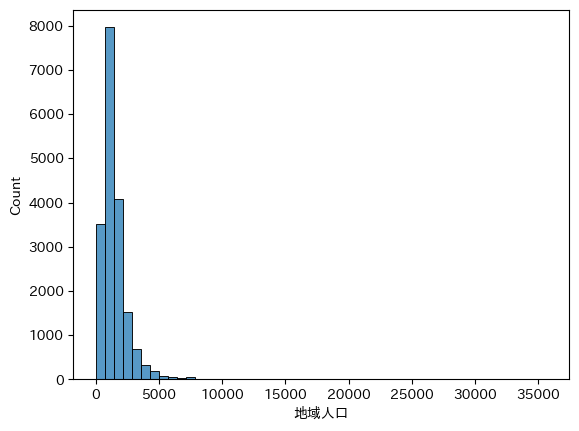

In [21]:
sns.histplot(x='地域人口', data=df, bins=50)


<Axes: >

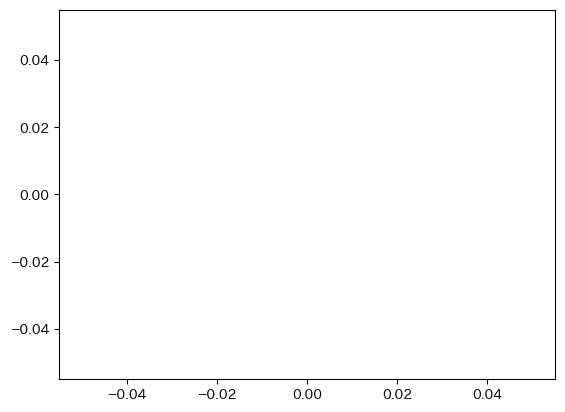

In [22]:
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 5000'))
